In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip '/content/drive/MyDrive/generated.zip'

In [ ]:
import os

directory = 'content/generated/'

file_mapping = {}

for filename in os.listdir(directory):
  filepath = os.path.join(directory, filename)
  words = filename.split('_')
  file_num = words[1]
  augmentation = words[2]
  if file_num not in file_mapping:
    file_mapping[file_num] = {augmentation: filepath}
  else:
    file_mapping[file_num][augmentation] = filepath

print(file_mapping)

{'125': {'pitch': 'content/generated/file_125_pitch_-2_output.wav', 'original': 'content/generated/file_125_original_output.wav', 'tempo': 'content/generated/file_125_tempo_0.75_output.wav', 'vol': 'content/generated/file_125_vol_16_output.wav'}, '116': {'original': 'content/generated/file_116_original_output.wav', 'tempo': 'content/generated/file_116_tempo_0.5_output.wav', 'pitch': 'content/generated/file_116_pitch_1_output.wav', 'vol': 'content/generated/file_116_vol_-7_output.wav'}, '186': {'original': 'content/generated/file_186_original_output.wav', 'pitch': 'content/generated/file_186_pitch_-3_output.wav', 'vol': 'content/generated/file_186_vol_4_output.wav', 'tempo': 'content/generated/file_186_tempo_1.75_output.wav'}, '162': {'pitch': 'content/generated/file_162_pitch_0_output.wav', 'vol': 'content/generated/file_162_vol_10_output.wav', 'original': 'content/generated/file_162_original_output.wav', 'tempo': 'content/generated/file_162_tempo_1.5_output.wav'}, '206': {'original': 

In [ ]:
import torch
import torchaudio
import torch.nn.functional as F
import matplotlib.pyplot as plt

def plot_waveform(waveform, sr, title="Waveform", ax=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    if ax is None:
        _, ax = plt.subplots(num_channels, 1)
    ax.plot(time_axis, waveform[0], linewidth=1)
    ax.grid(True)
    ax.set_xlim([0, time_axis[-1]])
    ax.set_title(title)

In [ ]:
i = 100

normal_filepath = file_mapping[str(i)]['original']
pitch_filepath = file_mapping[str(i)]['pitch']
vol_filepath = file_mapping[str(i)]['vol']
tempo_filepath = file_mapping[str(i)]['tempo']

pitch_value = pitch_filepath.split('_')[]

normal_output, normal_sr = torchaudio.load(normal_filepath)
pitch_output, pitch_sr = torchaudio.load(pitch_filepath)
vol_output, vol_sr = torchaudio.load(vol_filepath)
tempo_output, tempo_sr = torchaudio.load(tempo_filepath)

# ensure they all have the same sampling rate
assert normal_sr == pitch_sr == vol_sr == tempo_sr

# ensure they all waveforms have the same length
assert normal_output.size(1) == pitch_output.size(1) == vol_output.size(1) == tempo_output.size(1)

# normalize the waveforms
normal_output /= normal_output.abs().max()
pitch_output /= pitch_output.abs().max()
vol_output /= vol_output.abs().max()
tempo_output /= tempo_output.abs().max()

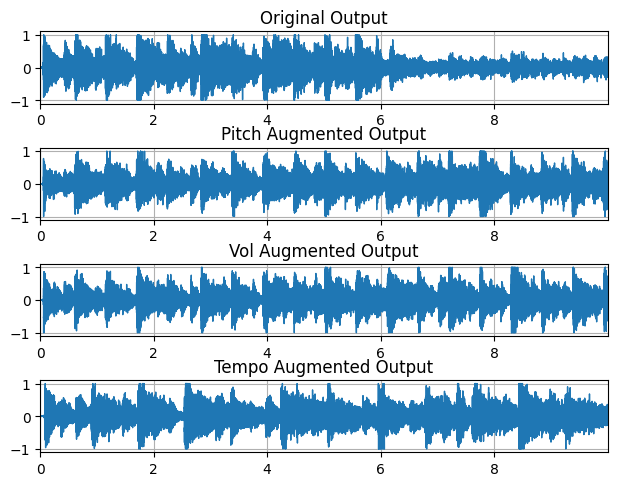

In [ ]:
fig, axs = plt.subplots(4, 1)
fig.tight_layout()
plot_waveform(normal_output, normal_sr, title="Original Output", ax=axs[0])
plot_waveform(pitch_output, pitch_sr, title="Pitch Augmented Output", ax=axs[1])
plot_waveform(vol_output, vol_sr, title="Vol Augmented Output", ax=axs[2])
plot_waveform(tempo_output, tempo_sr, title="Tempo Augmented Output", ax=axs[3])

tensor(0.2976)


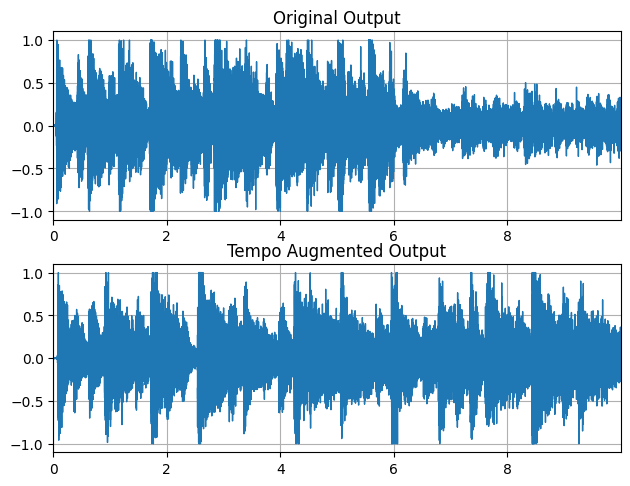

In [ ]:
# compare normal output with the tempo augmentation output for all 10 second
# calculate the root mean squared error between them
original_tempo_rmse = F.mse_loss(normal_output, tempo_output).sqrt()

fig, axs = plt.subplots(2, 1)
fig.tight_layout()
plot_waveform(normal_output, normal_sr, title="Original Output", ax=axs[0])
plot_waveform(tempo_output, tempo_sr, title="Tempo Augmented Output", ax=axs[1])



160000


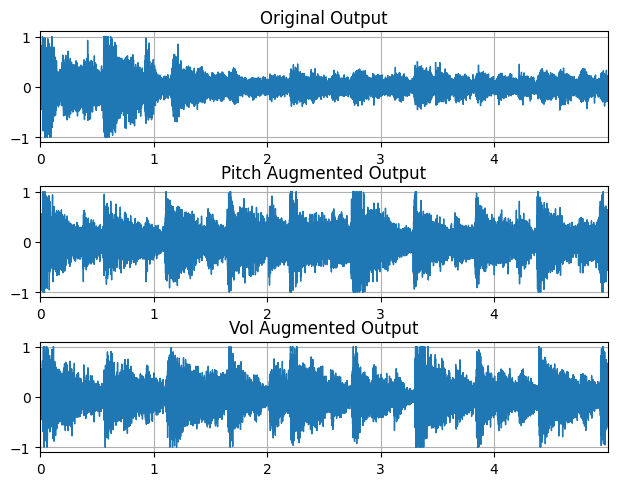

In [ ]:
# prompt duration set as first 5 seconds so we trim and only look at later 5 sec
halfway = int(normal_output.size(1) / 2)
print(halfway)
normal_output = normal_output[:, halfway:]
pitch_output = pitch_output[:, halfway:]
vol_output = vol_output[:, halfway:]

original_pitch_rmse = F.mse_loss(normal_output, pitch_output).sqrt()
original_vol_rmse = F.mse_loss(normal_output, vol_output).sqrt()

fig, axs = plt.subplots(3, 1)
fig.tight_layout()
plot_waveform(normal_output, normal_sr, title="Original Output", ax=axs[0])
plot_waveform(pitch_output, pitch_sr, title="Pitch Augmented Output", ax=axs[1])
plot_waveform(vol_output, vol_sr, title="Vol Augmented Output", ax=axs[2])


In [ ]:
print(original_pitch_rmse)
print(original_vol_rmse)
print(original_tempo_rmse)

tensor(0.2738)
tensor(0.2765)
tensor(0.2976)


In [ ]:
file_numbers = file_mapping.keys()

original_pitch_rmses = []
original_vol_rmses = []
original_tempo_rmses = []

for i in file_numbers:
  if len(file_mapping[str(i)]) == 4:
    normal_filepath = file_mapping[str(i)]['original']
    pitch_filepath = file_mapping[str(i)]['pitch']
    vol_filepath = file_mapping[str(i)]['vol']
    tempo_filepath = file_mapping[str(i)]['tempo']

    normal_output, normal_sr = torchaudio.load(normal_filepath)
    pitch_output, pitch_sr = torchaudio.load(pitch_filepath)
    vol_output, vol_sr = torchaudio.load(vol_filepath)
    tempo_output, tempo_sr = torchaudio.load(tempo_filepath)

    # ensure they all have the same sampling rate
    assert normal_sr == pitch_sr == vol_sr == tempo_sr

    # ensure they all waveforms have the same length
    assert normal_output.size(1) == pitch_output.size(1) == vol_output.size(1) == tempo_output.size(1)

    # normalize the waveforms
    normal_output /= normal_output.abs().max()
    pitch_output /= pitch_output.abs().max()
    vol_output /= vol_output.abs().max()
    tempo_output /= tempo_output.abs().max()

    # calculate root mean squared error between normal output and tempo
    original_tempo_rmses.append(F.mse_loss(normal_output, tempo_output).sqrt())

    # for volume and augmentation we trim off the prompt b/c they are the same as the normal output
    halfway = int(normal_output.size(1) / 2)
    normal_output = normal_output[:, halfway:]
    pitch_output = pitch_output[:, halfway:]
    vol_output = vol_output[:, halfway:]
    original_vol_rmses.append(F.mse_loss(normal_output, vol_output).sqrt())
    original_pitch_rmses.append(F.mse_loss(normal_output, pitch_output).sqrt())

# average all three lists of rmses
original_pitch_avg = sum(original_pitch_rmses) / len(original_pitch_rmses)
original_vol_avg = sum(original_vol_rmses) / len(original_vol_rmses)
original_tempo_avg = sum(original_tempo_rmses) / len(original_tempo_rmses)
print(f"The average root mean squared error loss between the original and pitch augmented outputs are {original_pitch_avg}")
print(f"The average root mean squared error loss between the original and volume augmented outputs are {original_vol_avg}")
print(f"The average root mean squared error loss between the original and tempo augmented outputs are {original_tempo_avg}")

The average root mean squared error loss between the original and pitch augmented outputs are 0.31271374225616455
The average root mean squared error loss between the original and volume augmented outputs are 0.3104439973831177
The average root mean squared error loss between the original and tempo augmented outputs are 0.2935928404331207
